In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv', index_col=0)
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
def rename(x):

    return [column.lower().replace(' ', '_') for column in x.columns]

df.columns = rename(df)
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [5]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [6]:
df = df.dropna(subset=['state', 'response', 'months_since_last_claim', 'number_of_open_complaints','vehicle_class','vehicle_size','vehicle_type'])
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [7]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
df['period'] = df['effective_to_date'].dt.to_period('Q')
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,period
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011Q1
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011Q1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,2011Q1
13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,2011Q1
16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2011Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,2011Q1
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,2011Q1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011Q1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011Q1


In [8]:
#Show DataFrame info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       4543 non-null   object        
 1   state                          4543 non-null   object        
 2   customer_lifetime_value        4543 non-null   float64       
 3   response                       4543 non-null   object        
 4   coverage                       4543 non-null   object        
 5   education                      4543 non-null   object        
 6   effective_to_date              4543 non-null   datetime64[ns]
 7   employmentstatus               4543 non-null   object        
 8   gender                         4543 non-null   object        
 9   income                         4543 non-null   int64         
 10  location_code                  4543 non-null   object        
 11  marital_status  

In [9]:
# Describe DataFrame.
summary = df.describe().T

def rounding(x):
    return round(x, 2)

summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,4543.0,8034.0,6960.0,1904.0,4039.0,5847.0,8937.0,83325.0,4898.0
income,4543.0,37453.0,30257.0,0.0,0.0,34455.0,61560.0,99961.0,61560.0
monthly_premium_auto,4543.0,94.0,35.0,61.0,69.0,83.0,110.0,298.0,41.0
months_since_last_claim,4543.0,15.0,10.0,0.0,6.0,14.0,23.0,35.0,17.0
months_since_policy_inception,4543.0,48.0,28.0,0.0,24.0,47.0,72.0,99.0,48.0
number_of_open_complaints,4543.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
number_of_policies,4543.0,3.0,2.0,1.0,1.0,2.0,4.0,9.0,3.0
total_claim_amount,4543.0,436.0,295.0,0.0,266.0,384.0,552.0,2893.0,286.0


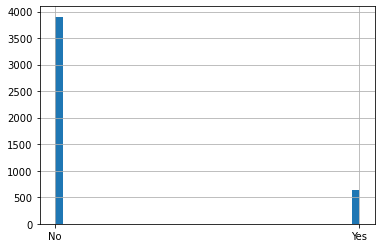

In [10]:
# Show a plot of the total number of responses.
df['response'].hist(bins=40)
plt.show()

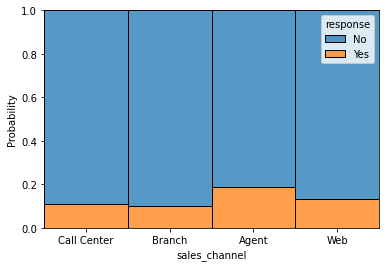

In [11]:
#Show a plot of the response rate by the sales channel.
sns.histplot(data=df, x='sales_channel', hue='response', stat='probability', multiple="fill")
plt.show()

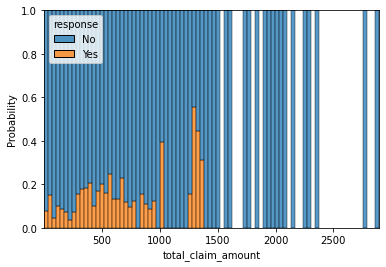

In [12]:
#Show a plot of the response rate by the total claim amount.
sns.histplot(data=df, x='total_claim_amount', hue='response', stat='probability', multiple="fill")
plt.show()

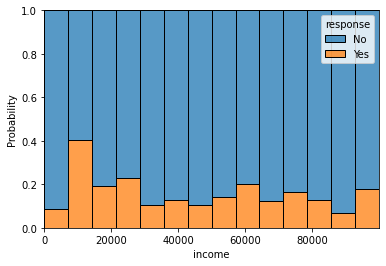

In [13]:
#Show a plot of the response rate by income.
sns.histplot(data=df, x='income', hue='response', stat='probability', multiple="fill")
plt.show()


In [14]:
# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical 
# columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical 
# data types and categorical data types respectively)
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

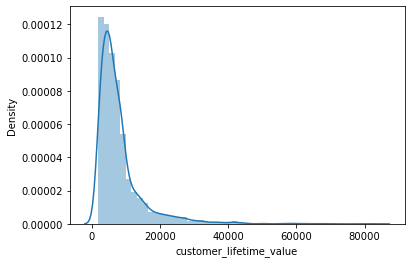

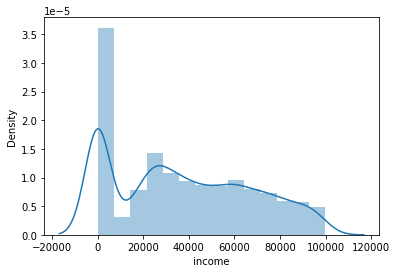

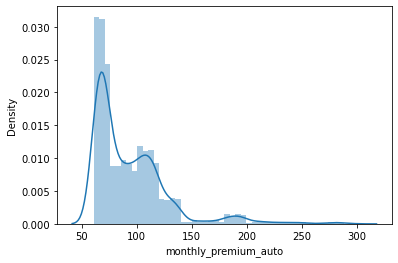

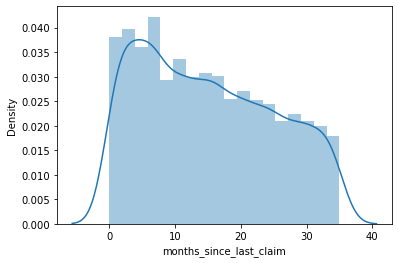

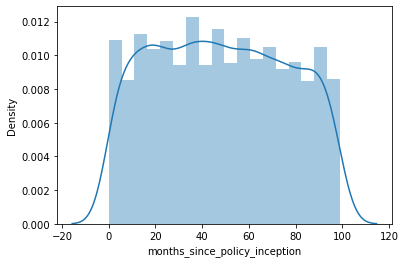

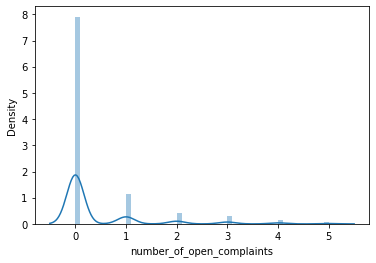

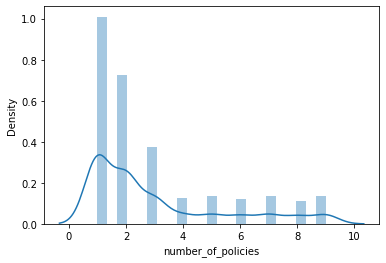

In [15]:
# Now we will try to check the normality of the numerical variables visually

   # Use seaborn library to construct distribution plots for the numerical variables
    
for column in X_num.columns:
    sns.distplot(X_num[column])
    plt.show()
    

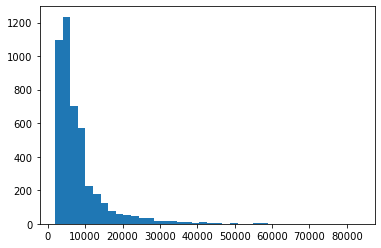

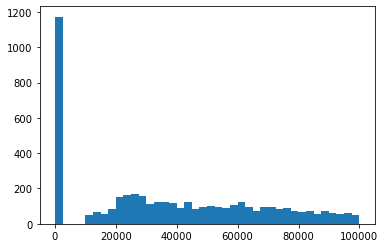

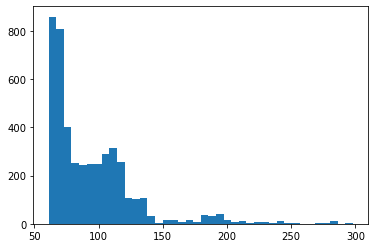

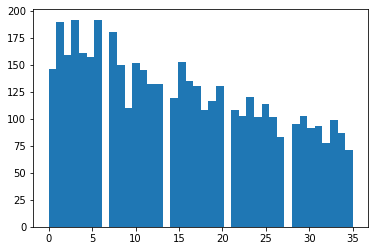

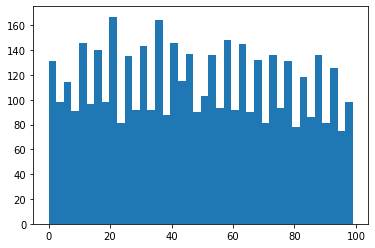

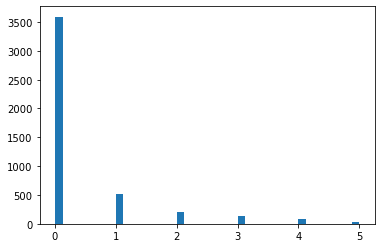

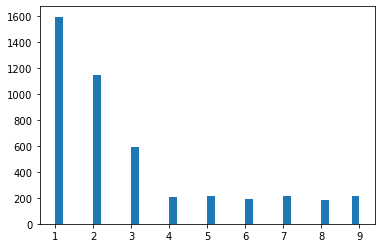

In [16]:
# Use Matplotlib to construct histograms

for column in X_num.columns:
    plt.hist(X_num[column], bins=40)
    plt.show()

In [17]:
# For the numerical variables, check the multicollinearity between the features. 
df.corr()
# Please note that we will use the column total_claim_amount later as the target variable.

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579
income,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311
monthly_premium_auto,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894
months_since_last_claim,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449
months_since_policy_inception,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610
number_of_open_complaints,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433
number_of_policies,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864
total_claim_amount,0.228579,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000


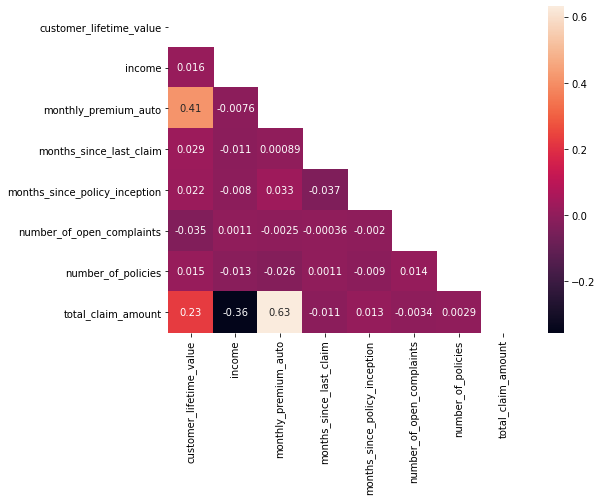

In [18]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# Write code for both the correlation matrix and for seaborn heatmap. 
# If there is no pair of features that have a high correlation, then do not drop any features

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

In [19]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,8033.714059,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525
std,6959.529443,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990
min,1904.000852,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4039.089902,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145
50%,5846.520588,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000
75%,8936.596938,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000
max,83325.381190,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [20]:
# X-y split.
#-> Guess i already did this


# Normalize (numerical).

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [21]:
df, _ci = boxcox_transform(df)
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,2.772755,1340.729369,0.697566,6.027652,19.457573,0.596185,0.622422,32.400641
std,0.031542,356.591242,0.000458,3.129315,9.251416,0.266492,0.529544,11.593214
min,2.701925,499.248400,0.696858,0.000000,0.000000,0.000000,0.000000,-1.413497
25%,2.751969,1091.644732,0.697172,3.517499,12.235503,0.627832,0.000000,26.938117
50%,2.772238,1369.462803,0.697552,6.333451,20.175900,0.627832,0.610074,32.401466
75%,2.792543,1549.816025,0.697968,8.523586,27.294098,0.627832,1.080002,38.787474
max,2.861957,2097.177369,0.698604,11.248753,34.494125,1.716605,1.494634,86.641810


In [22]:
df.corr()['total_claim_amount'].sort_values()

income                          -0.190090
months_since_last_claim         -0.021477
number_of_policies               0.002637
months_since_policy_inception    0.010330
number_of_open_complaints        0.035553
customer_lifetime_value          0.223008
monthly_premium_auto             0.497139
total_claim_amount               1.000000
Name: total_claim_amount, dtype: float64

In [23]:
# One Hot/Label Encoding (categorical).
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [25]:
X = np.concatenate([X_num, encoded], axis=1)
X.shape

(4543, 4592)

In [26]:
# traint-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
predictions  = model.predict(X_test)
predictions.shape

(1363,)

In [29]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.8225494415240664, 4.729348118088545, 22.36673362206766)